### Final Project - Hotel Booking cancelation

# Importing Library

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as ma

from scipy import stats
import statsmodels.api as sm
## Sklearn libraries
from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn import linear_model as lm
%matplotlib inline
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)

In [266]:
def col_rename(df, dict_rules, ip=True):
    ''' rename columns in data frame using a dictionary of rules  '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(dict_rules,dict):
        z = df.rename(columns = dict_rules, inplace=ip)
    else:
        raise TypeError
    return z
#
def print_unique(df,col):
    ''' gives a list of unique values in a field '''
    if isinstance(df,pd.core.frame.DataFrame) and isinstance(df[col],pd.core.frame.Series):
        z = df[col].unique()
    else:
        raise TypeError
    return z

### Importing the data
### data source https://www.kaggle.com/datasets/mojtaba142/hotel-booking

In [267]:
df = pd.read_csv("data/Hotel_booking.csv")

In [268]:
df["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

# Examining the data

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Checking NAN values in the dataset

In [270]:
df.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


We see missing values in the dataset,so lets check which column does have the most number of missing data?

Fill the missing values with '0' for "Agent" and "Company"
because if no agency is given it can be possible that the booking has been done without one,
if no company specified, it mean booking is done privately

In [271]:
# deal with missing values
def data_clean(df):
    df.fillna(0, inplace=True)
    print(df.isnull().sum())

data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Data Cleaning

Checking how many adults are there while booking

In [272]:
list = ['adults', 'children', 'babies']

for i in list:
    print('{} has unique values as {}'.format(i, df[i].unique()))

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


Filter out wrong entries where adults, childern and babies are '0' at a time

In [273]:
filter = (df['children']==0) & (df['adults']==0) & (df['babies']==0) 
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,Transient-Party,0.00,0,0,Check-Out,2015-10-06,Colleen Hernandez,Colleen.H25@yandex.com,863-349-5397,************8042
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,Transient,0.00,0,0,Check-Out,2015-10-12,Mark Martinez,Martinez.Mark@yahoo.com,969-893-1222,************9670
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,Transient-Party,0.00,0,0,Check-Out,2015-11-23,Carrie Carney,CarrieCarney@yandex.com,944-344-7905,************8964
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,Transient-Party,0.00,0,0,Check-Out,2016-01-04,Summer Stewart,Stewart_Summer84@aol.com,125-574-6642,************1069
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,Transient-Party,0.00,0,0,Check-Out,2016-01-05,Brian Buchanan,Brian.B@yahoo.com,946-176-5726,************9836
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,Transient,0.00,0,0,Canceled,2016-02-15,Alex Lang,Lang_Alex@mail.com,479-339-8268,************4034
9376,Resort Hotel,1,0,2016,November,48,21,0,0,0,...,Group,0.00,0,0,Canceled,2016-11-21,Justin Collins,Justin.C@att.com,721-919-3589,************6051
31765,Resort Hotel,0,31,2016,December,53,27,2,8,0,...,Transient,28.00,1,0,Check-Out,2017-01-06,Joseph Jacobs,Jacobs_Joseph67@hotmail.com,589-144-5273,************6920
32029,Resort Hotel,0,4,2017,January,2,14,0,1,0,...,Transient-Party,0.00,0,0,Check-Out,2017-01-15,Dr. John Spears MD,MD_Dr.@xfinity.com,210-686-2550,************3698
32827,Resort Hotel,0,46,2017,January,4,25,3,9,0,...,Transient,0.00,0,0,Check-Out,2017-02-06,Dr. Samuel Garcia,Dr..Garcia@mail.com,359-100-6104,************5068


# Droping the personal information and undefined columns from the data set

In [274]:
df.drop(["name", "email", "phone-number","credit_card"], axis = 1, inplace = True)
df.drop(df.loc[df['market_segment']== 'Undefined'].index, inplace=True)
df.drop(df.loc[df['assigned_room_type']== 'P'].index, inplace=True)
df.drop(df.loc[df['meal']== 'Undefined'].index, inplace=True)
df.drop(df.loc[df['distribution_channel']== 'Undefined'].index, inplace=True)
df = df[df.adr > 0]
df['agent'] = df['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df.drop(df[df['adults']<1].index, inplace= True)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['kids'] = df['children'] + df['babies']
df['guest_location'] = df['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,kids,guest_location
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.00,0.00,International
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.00,0.00,International
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.00,0.00,International
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.00,0.00,International
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,2.00,0.00,Local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.00,0.00,International
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.00,0.00,International
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.00,0.00,International
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.00,0.00,International


### Seperate the numerical columns from the dataset to Classification Modellinhg

In [275]:
numerical = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_guests',
 'kids']

### Checkig categorical columns

In [276]:
categorical=[column for column in df.columns if (df[column].dtype=='object')]
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'guest_location']

### Analysis with different features with catagorical values

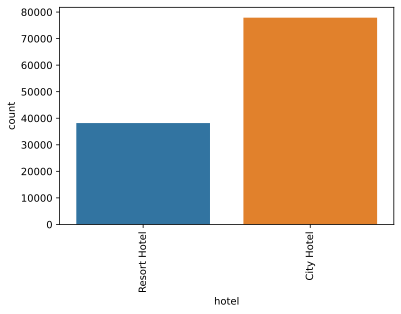

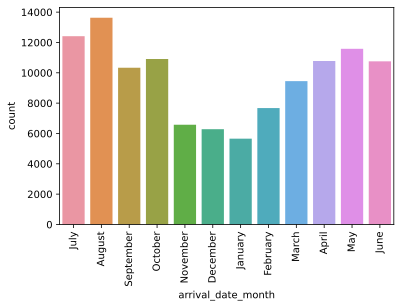

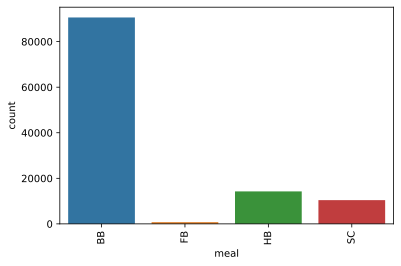

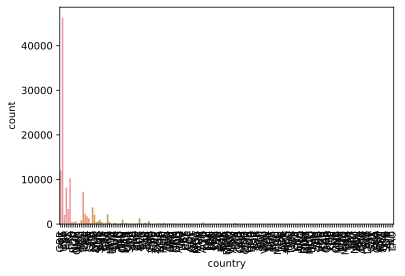

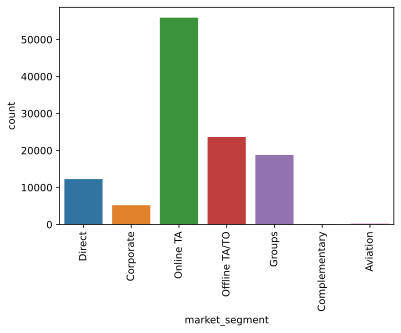

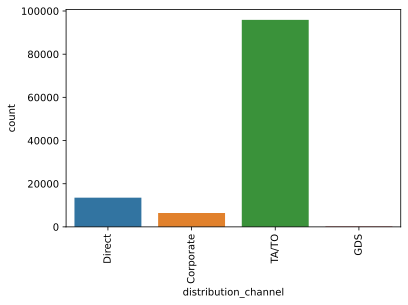

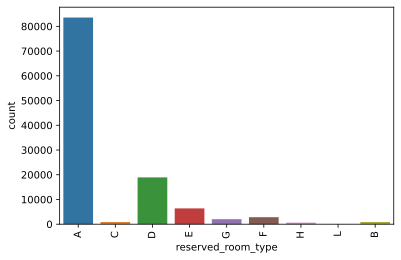

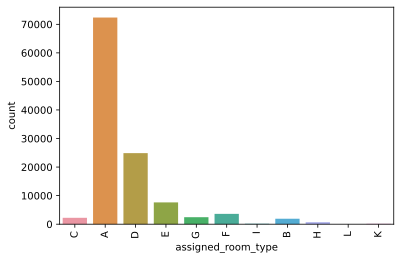

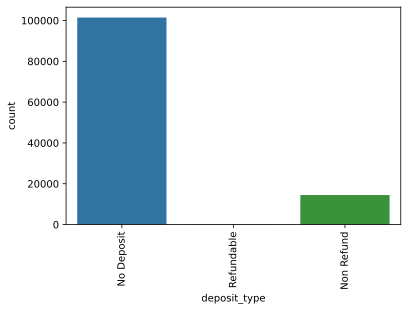

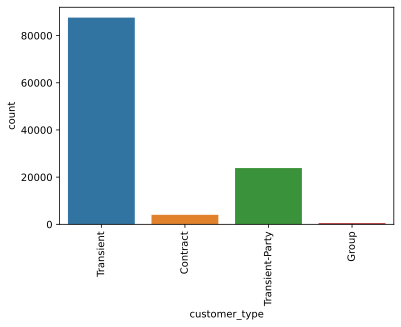

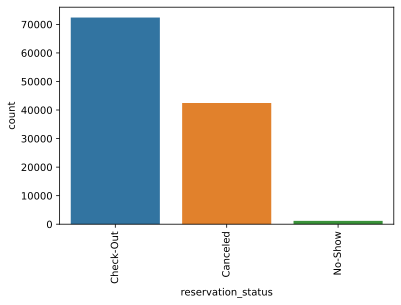

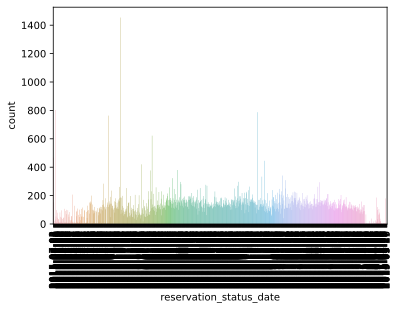

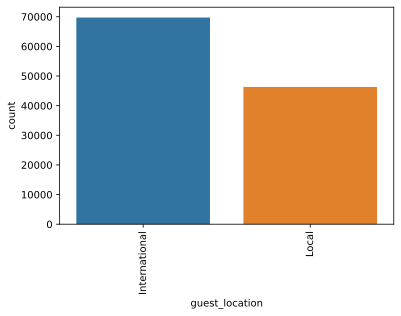

In [277]:
for column in categorical:
    sns.countplot(df[column])
    plt.xticks(rotation='90')
    plt.show()

In [278]:
Most_hotel_cancellation = df.groupby(['hotel', "is_canceled"])["is_canceled"].count()
Most_hotel_cancellation

hotel         is_canceled
City Hotel    0              44984
              1              32887
Resort Hotel  0              27421
              1              10754
Name: is_canceled, dtype: int64

In [279]:
a

hotel         is_canceled
City Hotel    0             0.58
              1             0.42
Resort Hotel  0             0.72
              1             0.28
Name: is_canceled, dtype: float64

<AxesSubplot:xlabel='hotel,is_canceled'>

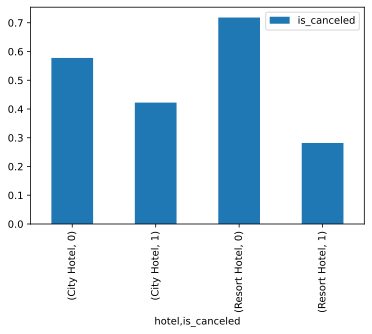

In [280]:
a = df.groupby(['hotel', "is_canceled"])["is_canceled"].count() / df.groupby('hotel')["is_canceled"].count()
pd.DataFrame(a).plot.bar(stacked=True)

### EDA

### Checking Confirmed and canceled booking percentage

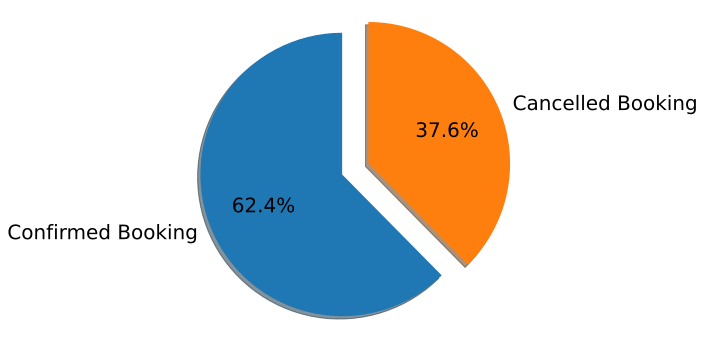

In [281]:
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal'); 

### Cancellation rate by Hotel Type

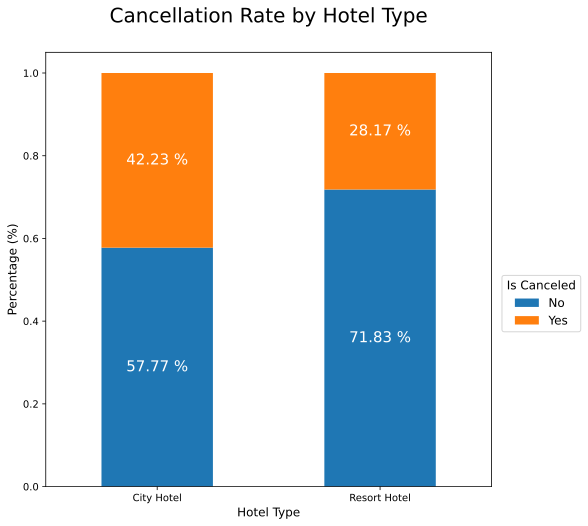

In [282]:
hotel_ax = pd.crosstab(df['hotel'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in hotel_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hotel_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Hotel Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

### Checking if the number of changes of the reservation affected by (market segment)?

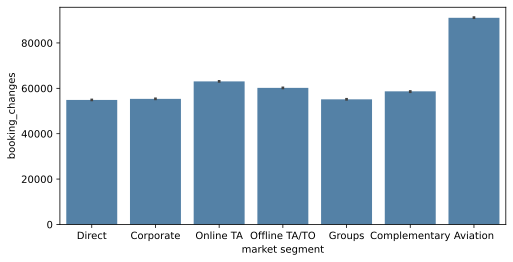

In [283]:
plt.figure(figsize=(8,4))
sns.barplot(y=df.booking_changes.index,x=df.market_segment
            ,ci=True,color='#4682B4')
plt.ylabel('booking_changes')
plt.xlabel('market segment');
%config InlineBackend.figure_format = 'svg'

### Repeated Guest v/s Non-Repeated Guest Cancellation

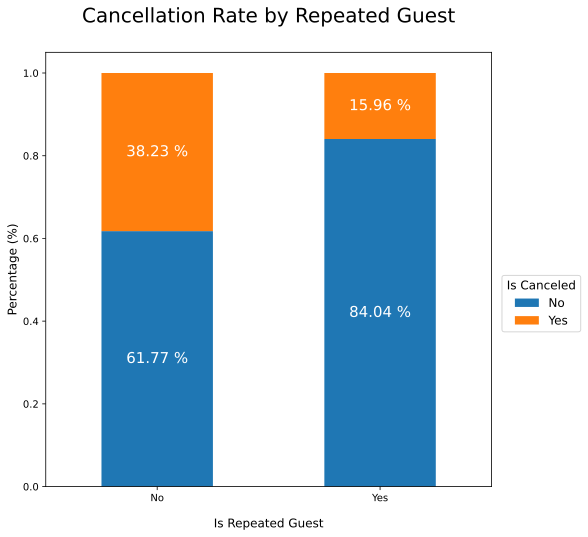

In [284]:
repeat_ax = pd.crosstab(df['is_repeated_guest'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in repeat_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    repeat_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Repeated Guest', fontsize=20, pad=30)    
repeat_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Is Repeated Guest', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

### Cancellation Rate by previous_cancellations

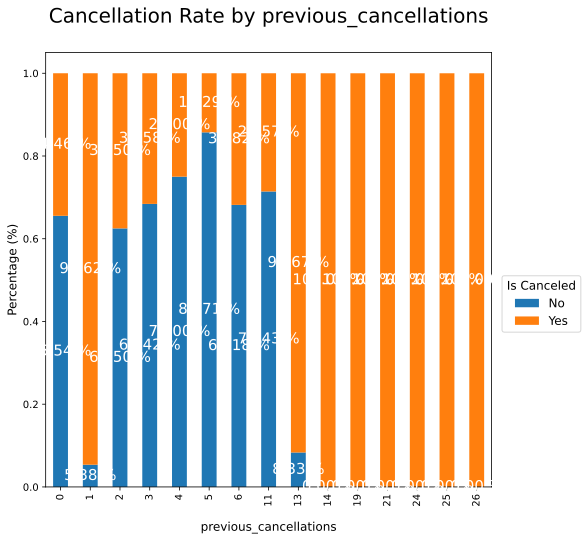

In [285]:
previous_cancellations_ax = pd.crosstab(df['previous_cancellations'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in previous_cancellations_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    previous_cancellations_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by previous_cancellations', fontsize=20, pad=30)    
repeat_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('previous_cancellations', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

### Cancellation Rate by total_of_special_requests

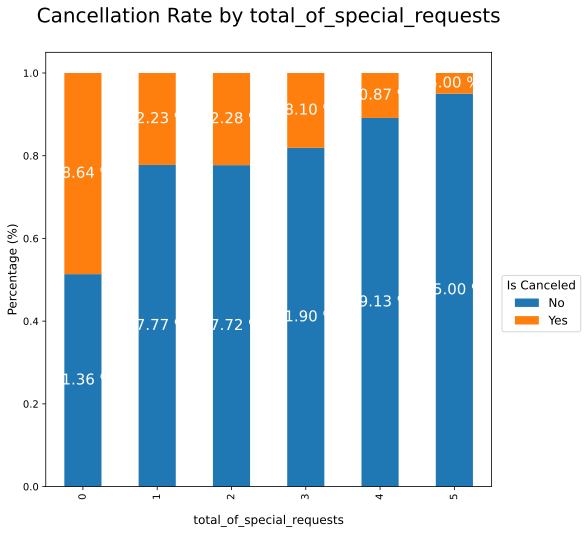

In [286]:
total_of_special_requests_ax = pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in total_of_special_requests_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    total_of_special_requests_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by total_of_special_requests', fontsize=20, pad=30)    
repeat_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('total_of_special_requests', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

### Splitting Data

In [287]:
x_num = df[['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_guests',
 'kids']]
x_num

y = df['is_canceled']

In [288]:
X_train, X_test, y_train, y_test=train_test_split(x_num, y, test_size=.2,random_state=123)

### Knn_Classification

In [289]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
#model.predict_proba(inputdata)

KeyboardInterrupt: 

### classification_plot_confusion_matrix
### Classification Model confusion matrix for training and test set

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### classification_model_evaluating
### Classification Model Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    performance_dataset = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    dataset_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    dataset_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_dataset, dataset_train, dataset_test

## calling the function
error_metrics_dataset,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred)
error_metrics_dataset

In [ ]:
y_pred_train

In [ ]:
# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=2) # n_neighbors = K

In [ ]:
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

In [ ]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

### Import liabrary for Decission tree 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install graphviz
#conda install -c conda-forge python-graphviz

,Error_metric,Train,Test
0,Accuracy,0.71,0.70
1,Precision,0.59,0.59
2,Recall,0.70,0.69


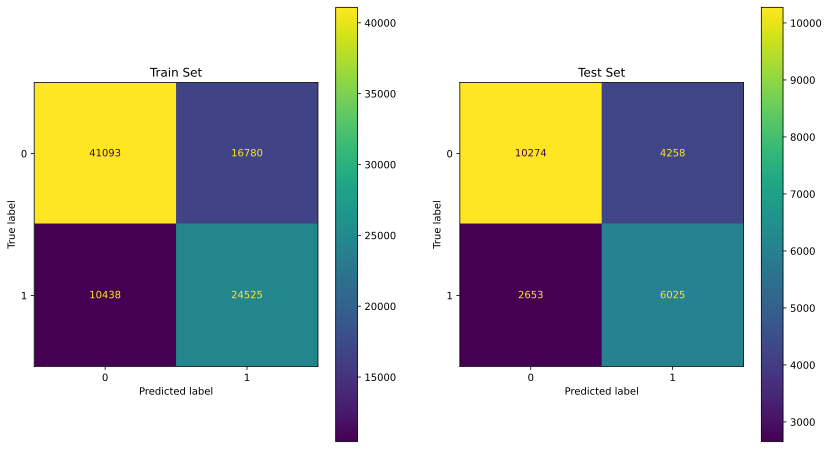

In [290]:
# The sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Features Importances

<BarContainer object of 21 artists>

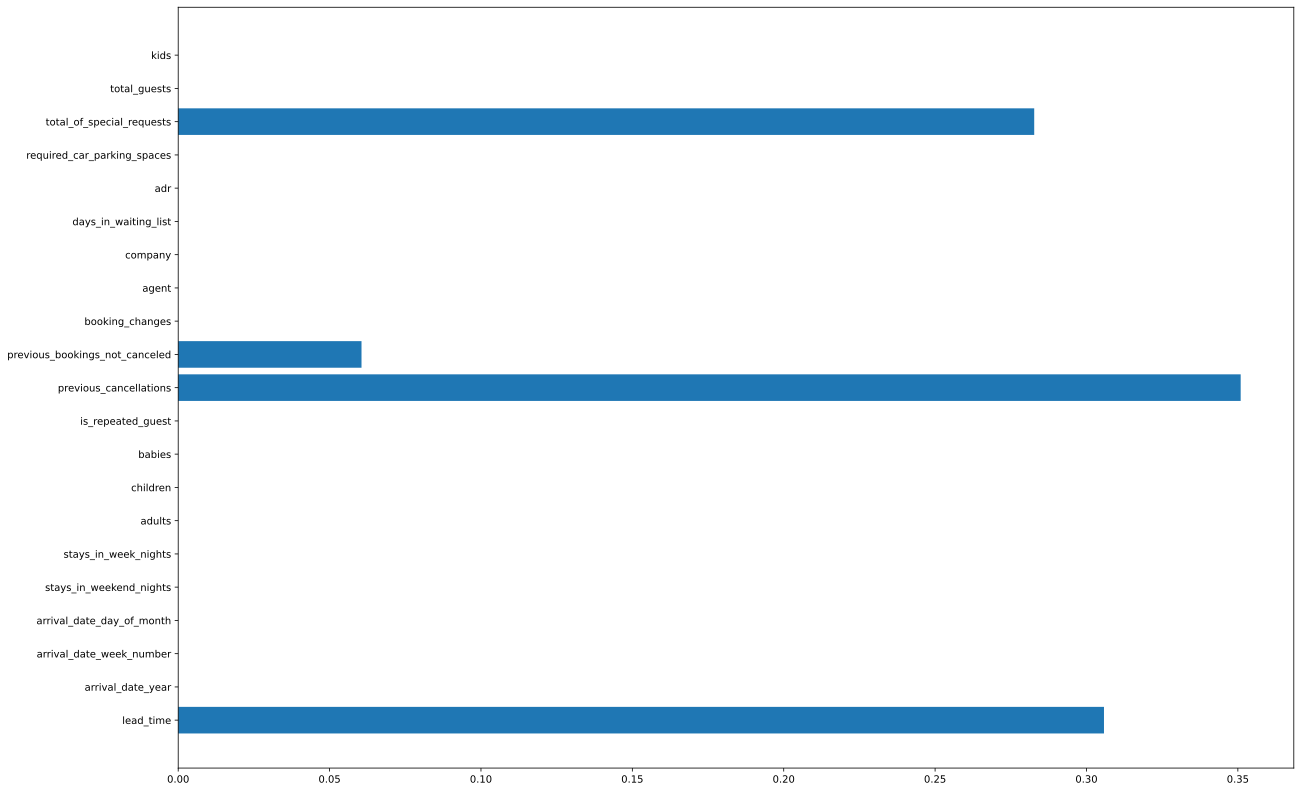

In [291]:
plt.figure(figsize=(20,14))
plt.barh(x_num.columns,model.feature_importances_)

### Fit a Decision Tree Classifier on the training data.

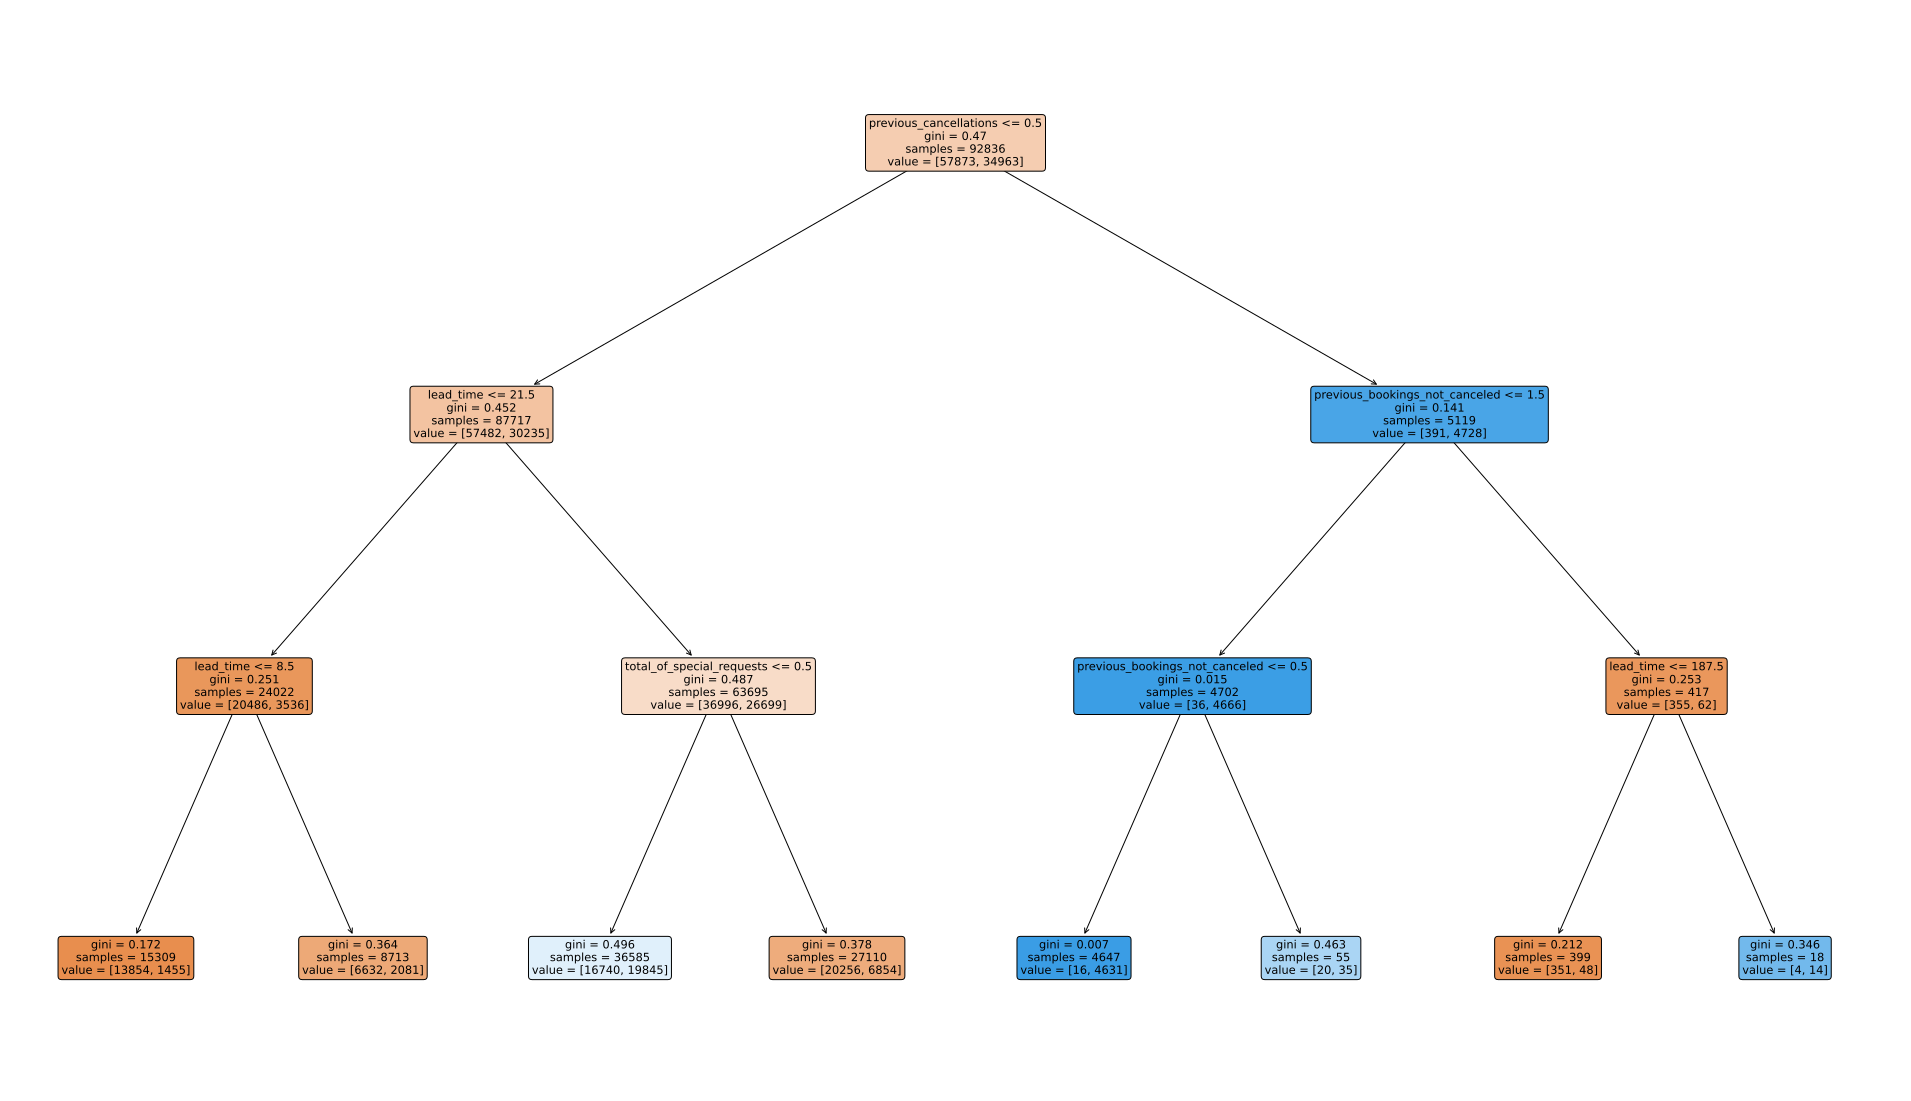

In [292]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=x_num.columns)
plt.show() 

### IMPORT DECISION TREE

In [293]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

### Validating with Decision Tree¶

In [294]:
X = df[['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 "company",
 "children",
 "agent",
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']]
y = df.is_canceled
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

print(X_train.shape)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

(116046, 19)
(116046,)
(92836, 19)
0.16779854904148472
0.9732891190458391


In [295]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.1645219 , 0.15907944, 0.15632107, 0.15520195, 0.15045997])

### Logistic Regression

In [296]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
#model.predict_proba(inputdata)

In [297]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))


0.7049116760017234
0.7082058684131156


In [298]:
feat = pd.DataFrame(model.coef_)
feat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.01,-0.00,-0.00,0.00,-0.09,-0.16,-0.01,-0.01,-0.02,0.24,-0.12,-0.27,-0.00,-0.01,0.00,-0.00,0.01,-0.13,-0.55


In [299]:
feat.columns = X_train.columns
feat

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,children,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.01,-0.00,-0.00,0.00,-0.09,-0.16,-0.01,-0.01,-0.02,0.24,-0.12,-0.27,-0.00,-0.01,0.00,-0.00,0.01,-0.13,-0.55


<BarContainer object of 19 artists>

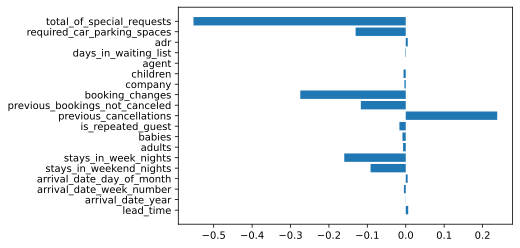

In [300]:
    plt.barh(feat.columns, feat.iloc[0,:])

In [301]:
error_metrics_dataset,y_train_vs_predicted, \
    y_test_vs_predicted=evaluate_classification_model(y_train, y_pred_train,
                                                    y_test, y_pred)
error_metrics_dataset

,Error_metric,Train,Test
0,Accuracy,0.71,0.70
1,Precision,0.68,0.68
2,Recall,0.42,0.41
